In [1]:
import numpy as np
from astropy.modeling.models import Sersic2D
import matplotlib.pyplot as plt
from astropy.coordinates import Angle
import pandas as pd
from astropy.io import fits

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/nasekhian/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/var/folders/xm/sl735y1n4m30kfvcxl7h4p6w0000gn/T/ipykernel_25111/2854241963.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
datas = pd.read_csv('merged_input_params.csv')

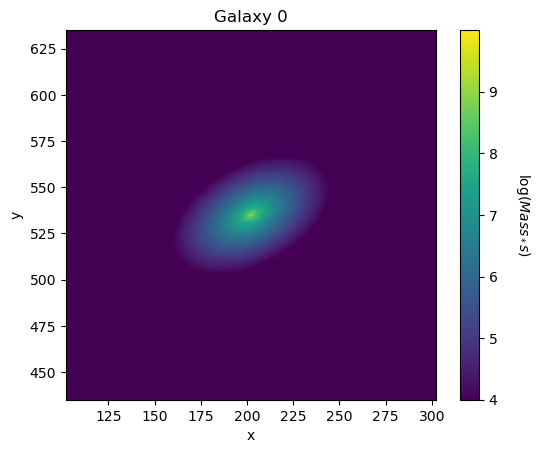

23.396197283961943


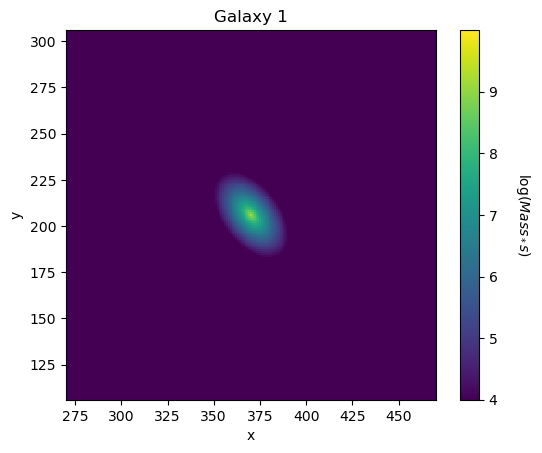

24.33313327660108


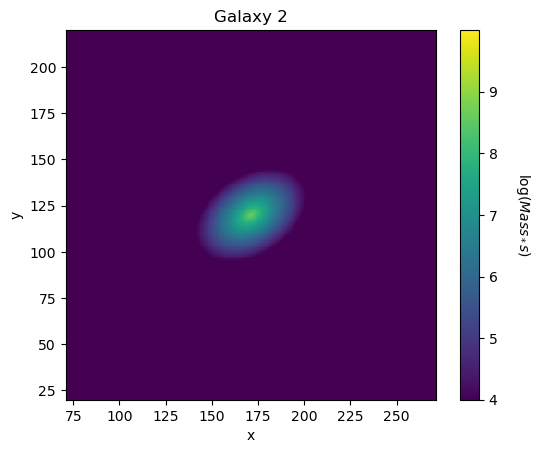

23.35320583852623


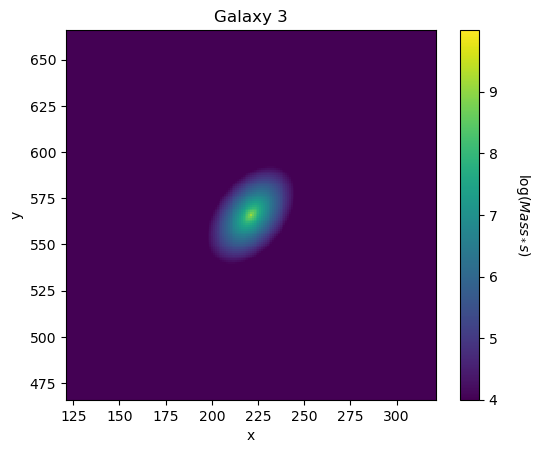

24.413889413767766


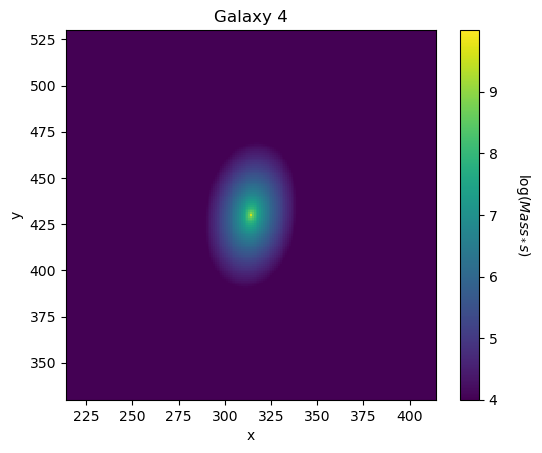

24.71228752187505


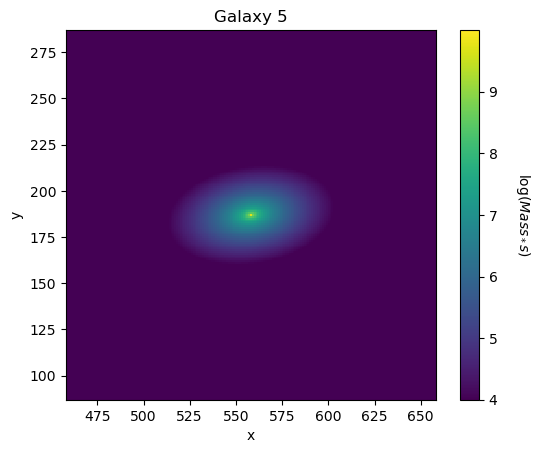

24.03001851143126


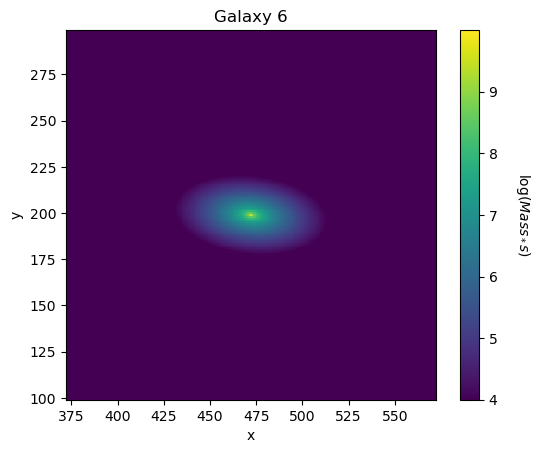

25.755263148925785


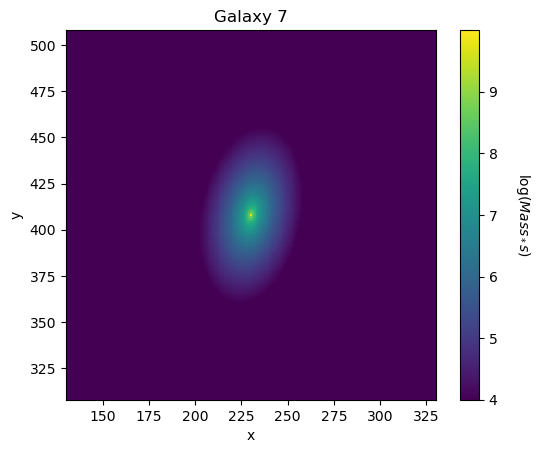

25.12378256346749


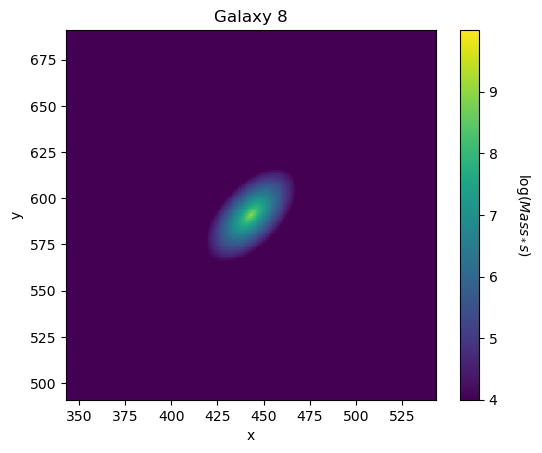

26.0253373909342


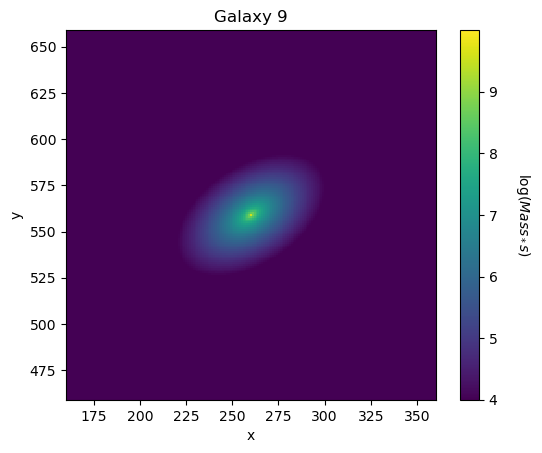

24.053320766440486


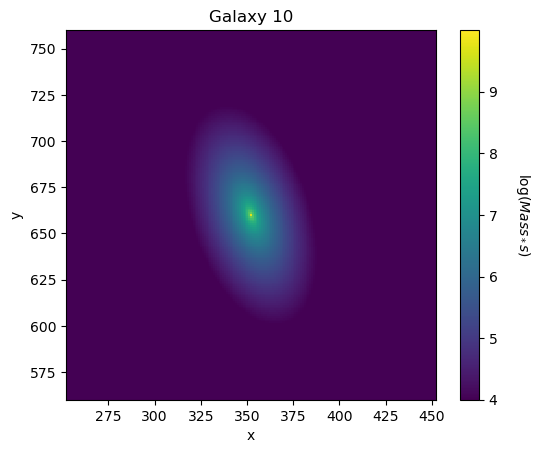

22.868060683125478


In [3]:


for index, row in datas.head(11).iterrows():
    # Specify the input file names
    galaxy_file = 'sci_f444w_22450.fits'
    psf_file = 'ePSFf444w.fits'

    # Load data
    galaxy_data, galaxy_header = fits.getdata(galaxy_file, header=True)
    
    y, x = np.mgrid[:galaxy_data.shape[0], :galaxy_data.shape[1]]

    galaxy_model = Sersic2D(amplitude=row['Amplitude'], r_eff=row['Effective_Radius'], n=row['Sersic_Index'],
                             x_0=row['x0'], y_0=row['y0'], ellip=row['Ellipticity'], theta=row['Theta'])
    
    img = galaxy_model(x, y)
    
    img_mass = (img / np.sum(img)) * 10**10.2
    
    log_img = np.log10(img_mass)
    
    fig, ax = plt.subplots()
    im = ax.imshow(log_img, origin='lower', interpolation='nearest', vmin=4, vmax=10)
    cbar = fig.colorbar(im, ax=ax)
    cbar.set_label(r'log($Mass_*s$)', rotation=270, labelpad=25)
    cbar.set_ticks([4, 5, 6, 7, 8, 9])
    
    # Set the limits for the x and y axes based on x0 and y0
    x0 = row['x0']
    y0 = row['y0']
    x_min = x0 - 100
    x_max = x0 + 100
    y_min = y0 - 100
    y_max = y0 + 100

    # Set the limits for the x and y axes
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    plt.xlabel('x')
    plt.ylabel('y')
    
    # Set the title of the plot
    plt.title(f"Galaxy {index}")
    
    plt.show()
    
    total_flux = np.sum(img)
    magnitude = -2.5 * np.log10(total_flux) + 23.9
    print(magnitude)